In [1]:
library(ggplot2) # Data visualization
library(readr)
library(dplyr)# CSV file

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
train <- read.csv("dataset.csv",header = TRUE)
head(train)

URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
M0_109,16,7,iso-8859-1,nginx,263,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2,1
B0_2314,16,6,UTF-8,Apache/2.4.10,15087,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0,0
B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
B0_113,17,6,ISO-8859-1,nginx,162,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8,0
B0_403,17,6,UTF-8,None,124140,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4,0
B0_2064,18,7,UTF-8,nginx,NA,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0,0


In [3]:
dim(train)

[1] 1781   21

In [4]:
str(train)

'data.frame':	1781 obs. of  21 variables:
 $ URL                      : Factor w/ 1781 levels "B0_1","B0_10",..: 1575 797 1480 133 983 548 1043 131 1705 1706 ...
 $ URL_LENGTH               : int  16 16 16 17 17 18 18 19 20 20 ...
 $ NUMBER_SPECIAL_CHARACTERS: int  7 6 6 6 6 7 6 6 5 5 ...
 $ CHARSET                  : Factor w/ 9 levels "ISO-8859","iso-8859-1",..: 2 7 5 3 7 7 2 5 6 6 ...
 $ SERVER                   : Factor w/ 239 levels ".V01 Apache",..: 177 60 124 177 210 177 16 124 188 188 ...
 $ CONTENT_LENGTH           : int  263 15087 324 162 124140 NA 345 324 NA NA ...
 $ WHOIS_COUNTRY            : Factor w/ 49 levels "[u'GB'; u'UK']",..: 31 31 31 48 48 37 48 48 31 31 ...
 $ WHOIS_STATEPRO           : Factor w/ 182 levels "-","--","6110021",..: 104 104 104 6 156 71 32 41 104 104 ...
 $ WHOIS_REGDATE            : Factor w/ 891 levels "0","1/02/1994 0:00",..: 60 891 891 807 94 645 608 259 846 846 ...
 $ WHOIS_UPDATED_DATE       : Factor w/ 594 levels "1/01/2017 0:00",..: 594 594 5

In [5]:
summary(train)


      URL         URL_LENGTH     NUMBER_SPECIAL_CHARACTERS       CHARSET   
 B0_1   :   1   Min.   : 16.00   Min.   : 5.00             UTF-8     :676  
 B0_10  :   1   1st Qu.: 39.00   1st Qu.: 8.00             ISO-8859-1:427  
 B0_100 :   1   Median : 49.00   Median :10.00             utf-8     :379  
 B0_1000:   1   Mean   : 56.96   Mean   :11.11             us-ascii  :155  
 B0_1001:   1   3rd Qu.: 68.00   3rd Qu.:13.00             iso-8859-1:134  
 B0_1002:   1   Max.   :249.00   Max.   :43.00             None      :  7  
 (Other):1775                                              (Other)   :  3  
                   SERVER    CONTENT_LENGTH   WHOIS_COUNTRY    WHOIS_STATEPRO
 Apache               :386   Min.   :     0   US     :1103   CA       :372   
 nginx                :211   1st Qu.:   324   None   : 306   None     :362   
 None                 :175   Median :  1853   CA     :  84   NY       : 75   
 Microsoft-HTTPAPI/2.0:113   Mean   : 11727   ES     :  63   WA       : 65   
 c

In [6]:
nrow(train)


[1] 1781

In [7]:
ncol(train)


[1] 21

In [8]:
#missing values
colSums(sapply(train,is.na))

URL                URL_LENGTH NUMBER_SPECIAL_CHARACTERS 
                        0                         0                         0 
                  CHARSET                    SERVER            CONTENT_LENGTH 
                        0                         1                       812 
            WHOIS_COUNTRY            WHOIS_STATEPRO             WHOIS_REGDATE 
                        0                         0                         0 
       WHOIS_UPDATED_DATE TCP_CONVERSATION_EXCHANGE      DIST_REMOTE_TCP_PORT 
                        0                         0                         0 
               REMOTE_IPS                 APP_BYTES        SOURCE_APP_PACKETS 
                        0                         0                         0 
       REMOTE_APP_PACKETS          SOURCE_APP_BYTES          REMOTE_APP_BYTES 
                        0                         0                         0 
              APP_PACKETS           DNS_QUERY_TIMES                      Type 
                        0                         1                         0

In [9]:
tail(train)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_45,194,17,UTF-8,Apache,NA,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0,1
1777,M4_48,194,16,UTF-8,Apache,NA,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0,1
1778,M4_41,198,17,UTF-8,Apache,NA,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0,1
1779,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4,0
1780,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NA,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0,0
1781,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6,0


In [10]:
var_names = names(train)
var_names

[1] "URL"                       "URL_LENGTH"               
 [3] "NUMBER_SPECIAL_CHARACTERS" "CHARSET"                  
 [5] "SERVER"                    "CONTENT_LENGTH"           
 [7] "WHOIS_COUNTRY"             "WHOIS_STATEPRO"           
 [9] "WHOIS_REGDATE"             "WHOIS_UPDATED_DATE"       
[11] "TCP_CONVERSATION_EXCHANGE" "DIST_REMOTE_TCP_PORT"     
[13] "REMOTE_IPS"                "APP_BYTES"                
[15] "SOURCE_APP_PACKETS"        "REMOTE_APP_PACKETS"       
[17] "SOURCE_APP_BYTES"          "REMOTE_APP_BYTES"         
[19] "APP_PACKETS"               "DNS_QUERY_TIMES"          
[21] "Type"

In [11]:
numeric_var = select_if(train, is.numeric)
colSums(sapply(numeric_var, is.na))

URL_LENGTH NUMBER_SPECIAL_CHARACTERS            CONTENT_LENGTH 
                        0                         0                       812 
TCP_CONVERSATION_EXCHANGE      DIST_REMOTE_TCP_PORT                REMOTE_IPS 
                        0                         0                         0 
                APP_BYTES        SOURCE_APP_PACKETS        REMOTE_APP_PACKETS 
                        0                         0                         0 
         SOURCE_APP_BYTES          REMOTE_APP_BYTES               APP_PACKETS 
                        0                         0                         0 
          DNS_QUERY_TIMES                      Type 
                        1                         0

In [12]:
categorical_var = select_if(train, is.factor)
colSums(sapply(categorical_var, is.na))

URL            CHARSET             SERVER      WHOIS_COUNTRY 
                 0                  0                  1                  0 
    WHOIS_STATEPRO      WHOIS_REGDATE WHOIS_UPDATED_DATE 
                 0                  0                  0

In [13]:
summary(categorical_var)


      URL             CHARSET                      SERVER    WHOIS_COUNTRY 
 B0_1   :   1   UTF-8     :676   Apache               :386   US     :1103  
 B0_10  :   1   ISO-8859-1:427   nginx                :211   None   : 306  
 B0_100 :   1   utf-8     :379   None                 :175   CA     :  84  
 B0_1000:   1   us-ascii  :155   Microsoft-HTTPAPI/2.0:113   ES     :  63  
 B0_1001:   1   iso-8859-1:134   cloudflare-nginx     : 94   AU     :  35  
 B0_1002:   1   None      :  7   (Other)              :801   PA     :  21  
 (Other):1775   (Other)   :  3   NA's                 :  1   (Other): 169  
   WHOIS_STATEPRO         WHOIS_REGDATE         WHOIS_UPDATED_DATE
 CA       :372    None           : 127   None            : 139    
 None     :362    17/09/2008 0:00:  62   2/09/2016 0:00  :  64    
 NY       : 75    13/01/2001 0:12:  59   12/12/2015 10:16:  59    
 WA       : 65    31/07/2000 0:00:  47   29/06/2016 0:00 :  47    
 Barcelona: 62    15/02/2005 0:00:  41   14/01/2017 0:00 

In [14]:
summary(numeric_var)


   URL_LENGTH     NUMBER_SPECIAL_CHARACTERS CONTENT_LENGTH  
 Min.   : 16.00   Min.   : 5.00             Min.   :     0  
 1st Qu.: 39.00   1st Qu.: 8.00             1st Qu.:   324  
 Median : 49.00   Median :10.00             Median :  1853  
 Mean   : 56.96   Mean   :11.11             Mean   : 11727  
 3rd Qu.: 68.00   3rd Qu.:13.00             3rd Qu.: 11323  
 Max.   :249.00   Max.   :43.00             Max.   :649263  
                                            NA's   :812     
 TCP_CONVERSATION_EXCHANGE DIST_REMOTE_TCP_PORT   REMOTE_IPS    
 Min.   :   0.00           Min.   :  0.000      Min.   : 0.000  
 1st Qu.:   0.00           1st Qu.:  0.000      1st Qu.: 0.000  
 Median :   7.00           Median :  0.000      Median : 2.000  
 Mean   :  16.26           Mean   :  5.473      Mean   : 3.061  
 3rd Qu.:  22.00           3rd Qu.:  5.000      3rd Qu.: 5.000  
 Max.   :1194.00           Max.   :708.000      Max.   :17.000  
                                                         

In [15]:
table(train$Type)


   0    1 
1565  216 

In [16]:
cat_var_names = names(categorical_var)
cat_var_names

[1] "URL"                "CHARSET"            "SERVER"            
[4] "WHOIS_COUNTRY"      "WHOIS_STATEPRO"     "WHOIS_REGDATE"     
[7] "WHOIS_UPDATED_DATE"

In [17]:
with(train, table(Type, CHARSET))


    CHARSET
Type ISO-8859 iso-8859-1 ISO-8859-1 None us-ascii utf-8 UTF-8 windows-1251
   0        1        121        382    6      151   359   544            0
   1        0         13         45    1        4    20   132            1
    CHARSET
Type windows-1252
   0            1
   1            0

In [18]:
with(train, table(Type, WHOIS_COUNTRY))


    WHOIS_COUNTRY
Type [u'GB'; u'UK']   AE   AT   AU   BE   BR   BS   BY   CA   CH   CN Cyprus
   0              5    1    4   35    3    0    4    1   82    6    7      2
   1              0    0    0    0    0    2    0    0    2    0    3      0
    WHOIS_COUNTRY
Type   CZ   DE   ES   FR   GB   HK   IE   IL   IN   IT   JP   KG   KR   KY   LU
   0    1    2    1    8   15    3    1    2    9    1   11    2    3    3    1
   1    8    1   62    1    4    0    0    0    1    0    0    0    2    0    0
    WHOIS_COUNTRY
Type   LV   NL   NO None   PA   PH   PK   ru   RU   SC   se   SE   SI   TH   TR
   0    1    6    2  241   19    4    0    0    0    3    1    3    2    1    3
   1    0    0    0   65    2    0    1    4    2    0    0    0    0    0    0
    WHOIS_COUNTRY
Type   UA   UG   UK United Kingdom   us   US   UY
   0    0    0    9              1    2 1054    0
   1    2    1    1              0    1   49    2

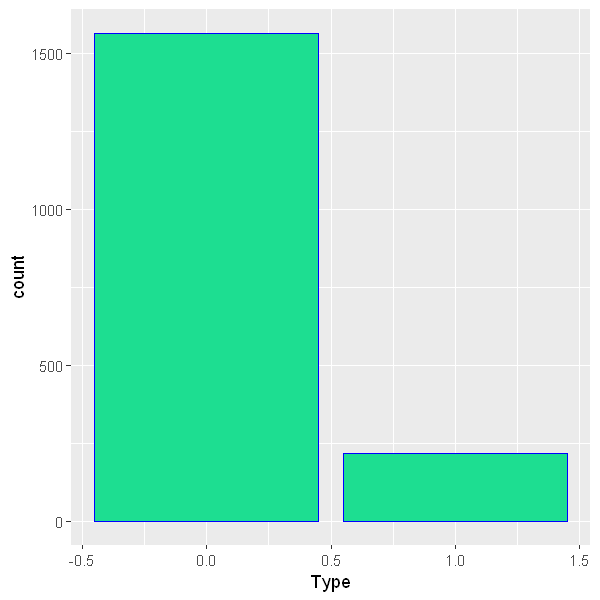

In [19]:
#PLOTTING THE TARGET FEATURE
library(repr)
options(repr.plot.width=5, repr.plot.height=5)
ggplot(train, aes(x = Type)) + geom_bar(color='blue',fill = "#1dde91")

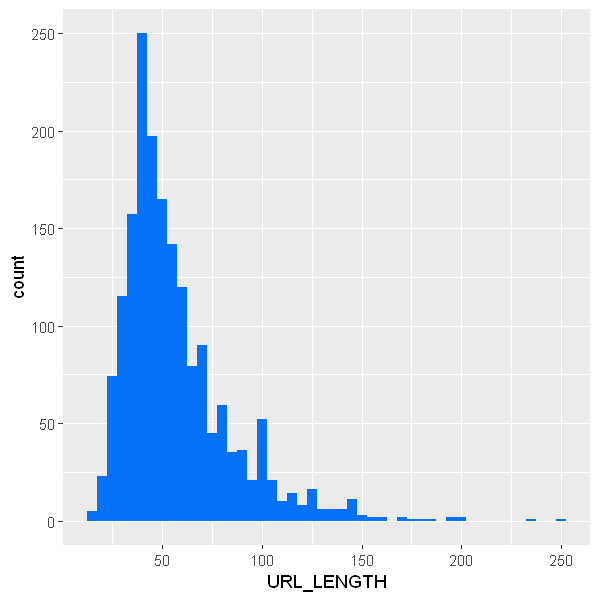

In [20]:
# PLOT TARGET FEATURES WITH NUMERIC FEATURES
#plots a histogram for url_length and count of these found
ggplot(train, aes(x = URL_LENGTH)) + geom_histogram(binwidth = 5, fill = "#0571f5")+ scale_fill_hue(l=40, c=35)

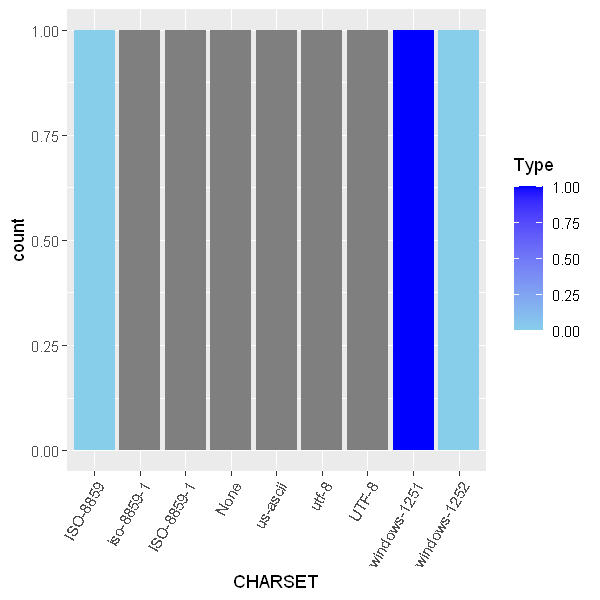

In [21]:
ggplot(train, aes(x = CHARSET, fill = Type)) + geom_bar(position = "fill") + 
theme(axis.text.x = element_text(angle = 60, hjust = 1))+
scale_fill_gradient(low="skyblue", high="blue")

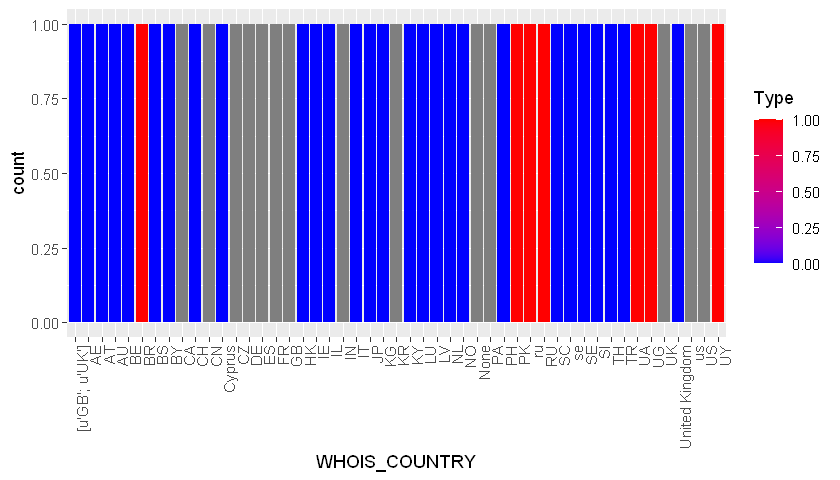

In [22]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(train, aes(x = WHOIS_COUNTRY, fill = Type)) + geom_bar(position = "fill") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
scale_fill_gradient(low="blue", high="red")

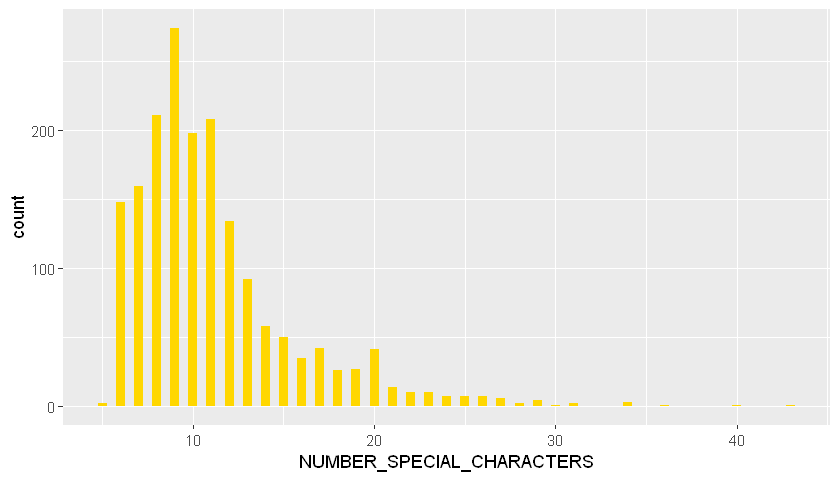

In [23]:
ggplot(train, aes(x = NUMBER_SPECIAL_CHARACTERS)) + geom_histogram(binwidth = 0.5, fill = "gold")+ scale_fill_hue(l=40, c=35)

In [24]:
library(purrr)
library(tidyr)

Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 813 rows containing non-finite values (stat_bin)."

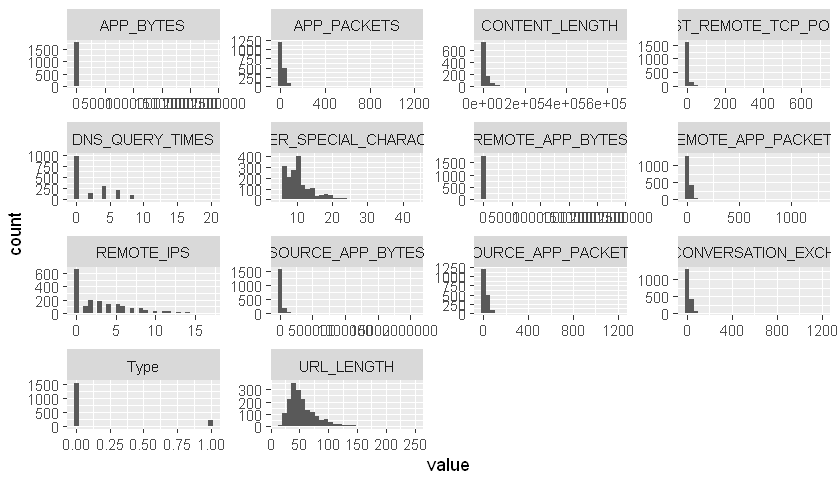

In [25]:
train %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

Warning message:
"Removed 813 rows containing non-finite values (stat_density)."

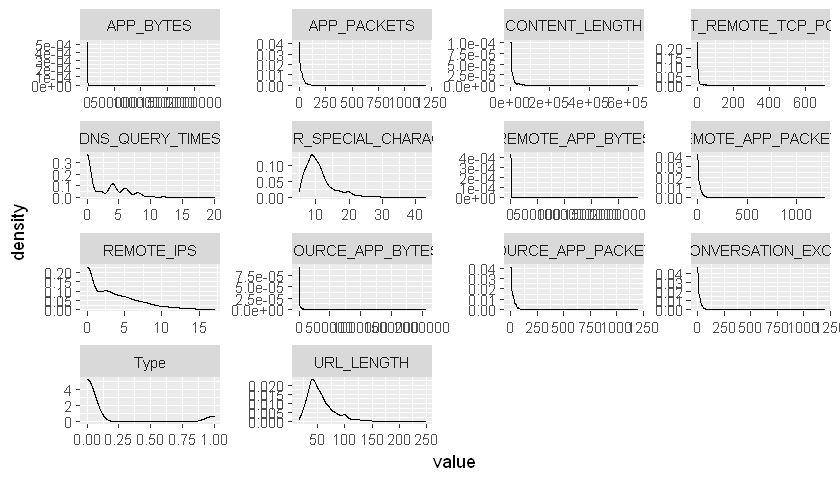

In [26]:
train %>%
  keep(is.numeric) %>%                     # Keep only numeric columns
  gather() %>%                             # Convert to key-value pairs
  ggplot(aes(value)) +                     # Plot the values
    facet_wrap(~ key, scales = "free") +   # In separate panels
    geom_density()  

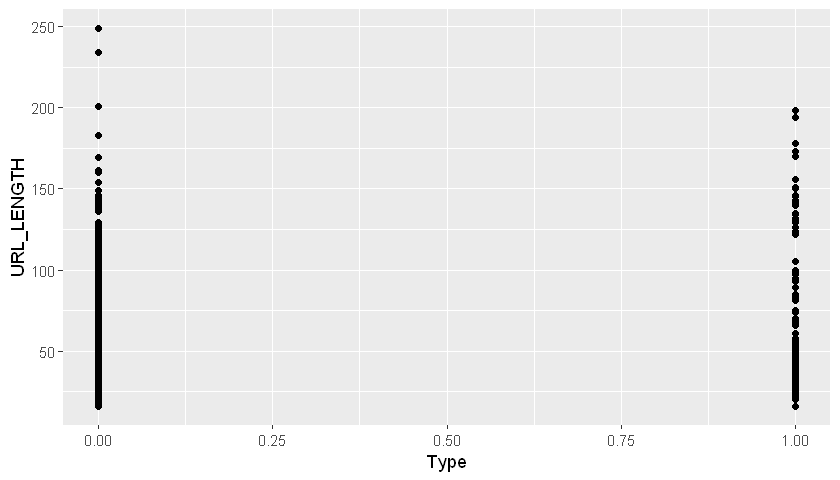

In [27]:
#PLOTTING THE NUMERIC AND CAGEORICAL FEATURES
ggplot(train, aes(x=Type,y=URL_LENGTH)) + geom_point()

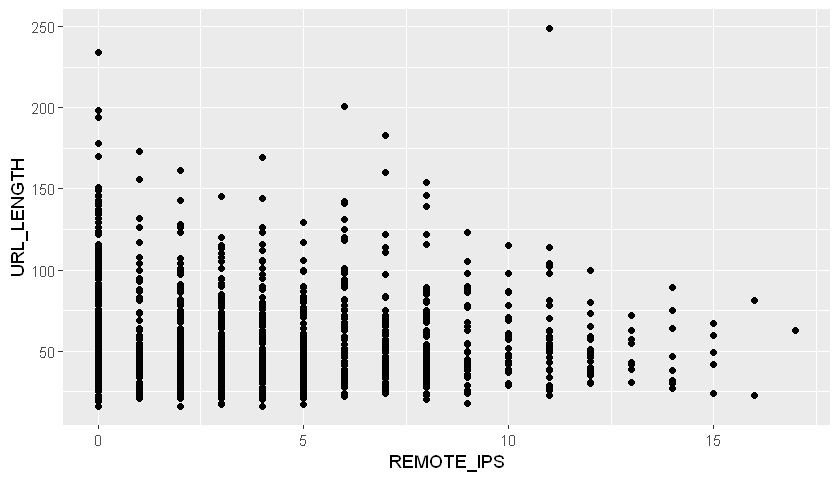

In [28]:
ggplot(train, aes(x=REMOTE_IPS,y=URL_LENGTH)) + geom_point(fill='red')

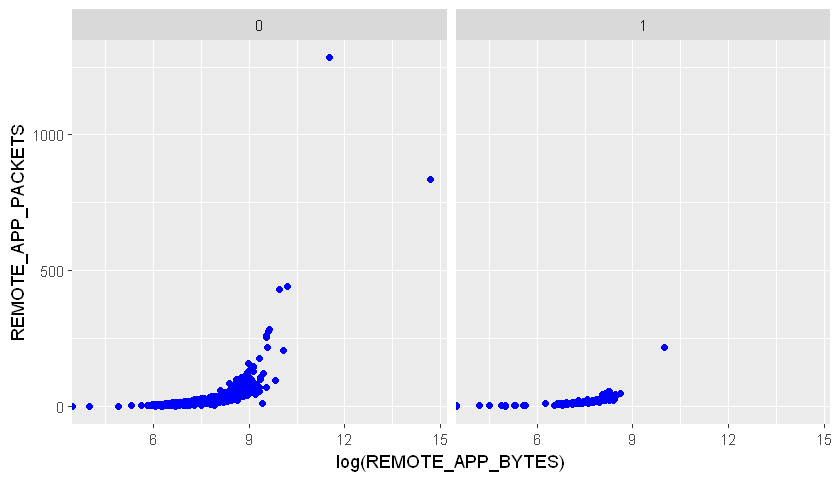

In [29]:
ggplot(train, aes(x=log(REMOTE_APP_BYTES),y=REMOTE_APP_PACKETS)) + geom_point(color='blue')+ facet_wrap(~Type)

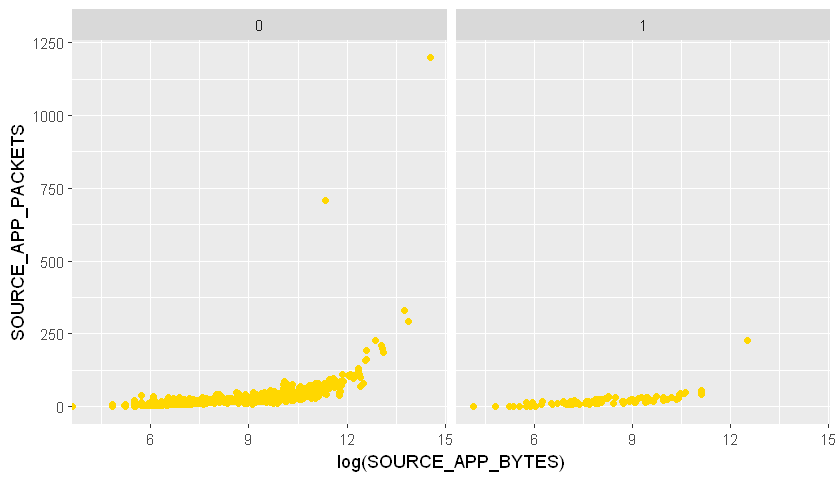

In [30]:
ggplot(train, aes(x=log(SOURCE_APP_BYTES),y=SOURCE_APP_PACKETS)) + geom_point(color='gold')+ facet_wrap(~Type)

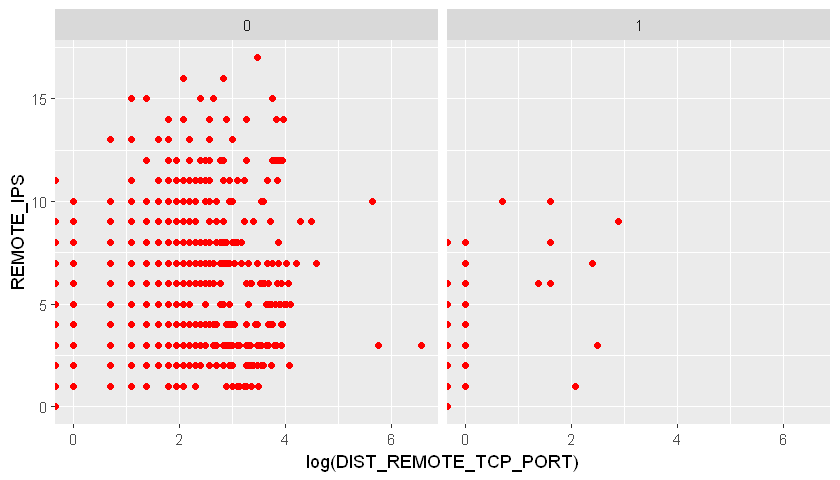

In [31]:
ggplot(train, aes(x=log(DIST_REMOTE_TCP_PORT),y=REMOTE_IPS)) + geom_point(color='red')+ facet_wrap(~Type)

corrplot 0.84 loaded


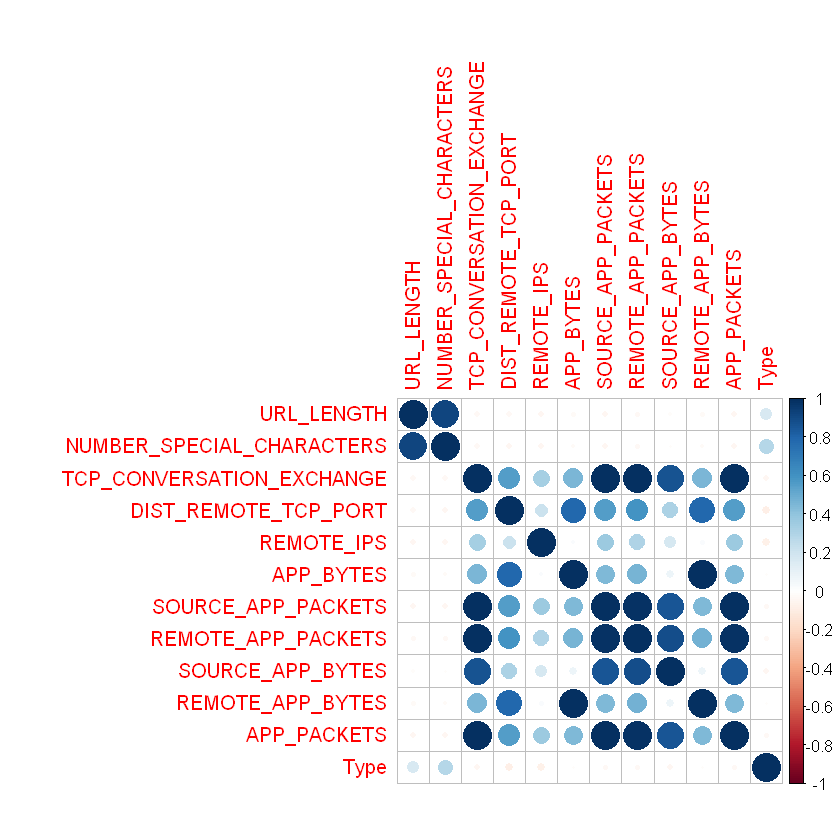

In [32]:
#CORRELOGRAM PLOT FOR NUMERIC FEATURES.
library(corrplot)
options(repr.plot.width=7, repr.plot.height=7)
numeric_var1 <- subset(numeric_var, select = -c(CONTENT_LENGTH, DNS_QUERY_TIMES))
library(corrplot)
M <- cor(numeric_var1)
corrplot(M, method = "circle")

In [33]:
options(repr.plot.width=5, repr.plot.height=5)


In [34]:
missing_row = train[!complete.cases(train),]
head(missing_row)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
6,B0_2064,18,7,UTF-8,nginx,NA,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0,0
9,M2_17,20,5,utf-8,nginx/1.10.1,NA,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2,1
10,M3_75,20,5,utf-8,nginx/1.10.1,NA,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2,1
11,B0_1013,20,6,utf-8,Apache,NA,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,...,0,0,0,0,0,0,0,0,0,0
21,B0_161,22,6,utf-8,openresty/1.11.2.1,NA,US,CA,3/07/1999 0:00,7/08/2015 0:00,...,29,6,3833,43,42,22495,4125,43,4,0
25,B0_601,22,6,UTF-8,nginx/1.12.0,NA,US,FL,1/08/2002 0:00,22/03/2016 0:00,...,0,3,650,10,10,1417,950,10,4,0


In [35]:
nrow(missing_row)


[1] 814

In [36]:
sum(is.na(train))/(nrow(train)*ncol(train))


[1] 0.02176412

In [37]:
pMiss = function(x){sum(is.na(x))/length(x)*100}
apply(train,2,pMiss)

URL                URL_LENGTH NUMBER_SPECIAL_CHARACTERS 
               0.00000000                0.00000000                0.00000000 
                  CHARSET                    SERVER            CONTENT_LENGTH 
               0.00000000                0.05614823               45.59236384 
            WHOIS_COUNTRY            WHOIS_STATEPRO             WHOIS_REGDATE 
               0.00000000                0.00000000                0.00000000 
       WHOIS_UPDATED_DATE TCP_CONVERSATION_EXCHANGE      DIST_REMOTE_TCP_PORT 
               0.00000000                0.00000000                0.00000000 
               REMOTE_IPS                 APP_BYTES        SOURCE_APP_PACKETS 
               0.00000000                0.00000000                0.00000000 
       REMOTE_APP_PACKETS          SOURCE_APP_BYTES          REMOTE_APP_BYTES 
               0.00000000                0.00000000                0.00000000 
              APP_PACKETS           DNS_QUERY_TIMES                      Type 
               0.00000000                0.05614823                0.00000000

Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Warning message:
"package 'colorspace' was built under R version 3.6.3"Loading required package: grid
Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following object is masked from 'package:purrr':

    transpose

The following objects are masked from 'package:dplyr':

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep

Warning message in plot.aggr(res, ...):
"not enough horizontal space to display frequencies"


 Variables sorted by number of missings: 
                  Variable        Count
            CONTENT_LENGTH 0.4559236384
                    SERVER 0.0005614823
           DNS_QUERY_TIMES 0.0005614823
                       URL 0.0000000000
                URL_LENGTH 0.0000000000
 NUMBER_SPECIAL_CHARACTERS 0.0000000000
                   CHARSET 0.0000000000
             WHOIS_COUNTRY 0.0000000000
            WHOIS_STATEPRO 0.0000000000
             WHOIS_REGDATE 0.0000000000
        WHOIS_UPDATED_DATE 0.0000000000
 TCP_CONVERSATION_EXCHANGE 0.0000000000
      DIST_REMOTE_TCP_PORT 0.0000000000
                REMOTE_IPS 0.0000000000
                 APP_BYTES 0.0000000000
        SOURCE_APP_PACKETS 0.0000000000
        REMOTE_APP_PACKETS 0.0000000000
          SOURCE_APP_BYTES 0.0000000000
          REMOTE_APP_BYTES 0.0000000000
               APP_PACKETS 0.0000000000
                      Type 0.0000000000


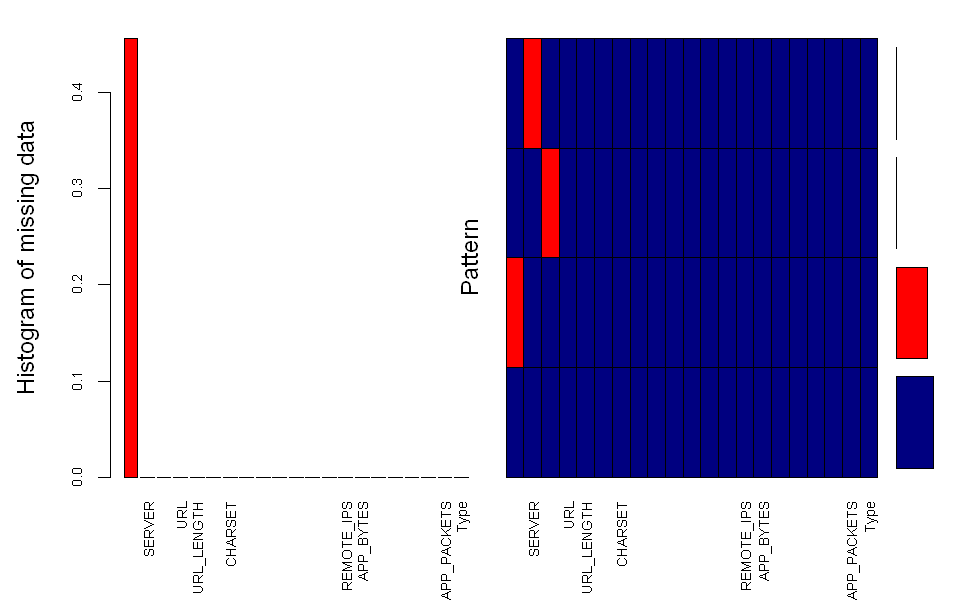

In [38]:
options(repr.plot.width=8, repr.plot.height=5)
library(VIM)
aggr_plot = aggr(train, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE,
                 labels=names(train), cex.axis=.7, gap=1,
                 ylab=c("Histogram of missing data","Pattern"))

In [39]:
library(Hmisc)
train$DNS_QUERY_TIMES=impute(train$DNS_QUERY_TIMES, 0)
train$SERVER=impute(train$SERVER, 'nginx')
train$CONTENT_LENGTH=impute(train$CONTENT_LENGTH, mean)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [40]:
head(train$CONTENT_LENGTH, 100)


  [1]    263.00   15087.00     324.00     162.00  124140.00   11726.93*
  [7]    345.00     324.00   11726.93*  11726.93*  11726.93*    324.00 
 [13]  13716.00    3692.00   13054.00     957.00     686.00     324.00 
 [19]  15025.00     324.00   11726.93*    318.00     224.00    4421.00 
 [25]  11726.93*    441.00   11726.93*   6671.00   11726.93*    434.00 
 [31]    324.00   13001.00    3257.00    6748.00   11726.93*  11726.93*
 [37]  11726.93*  11726.93*  11726.93*  11726.93*    240.00    3985.00 
 [43]    324.00    6173.00     319.00   11726.93*     34.00   11726.93*
 [49]   1778.00   11726.93*    324.00     224.00   11726.93*    318.00 
 [55]  11726.93*    345.00     756.00   11726.93*  11726.93*  14839.00 
 [61]    324.00   11726.93*  11726.93*    658.00   11726.93*  11726.93*
 [67]    195.00     324.00   11726.93*  11726.93*  11726.93*   4166.00 
 [73]    962.00     962.00     962.00    2688.00   11726.93*  11726.93*
 [79]    199.00    3548.00   11726.93*      0.00    5426.00   11

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

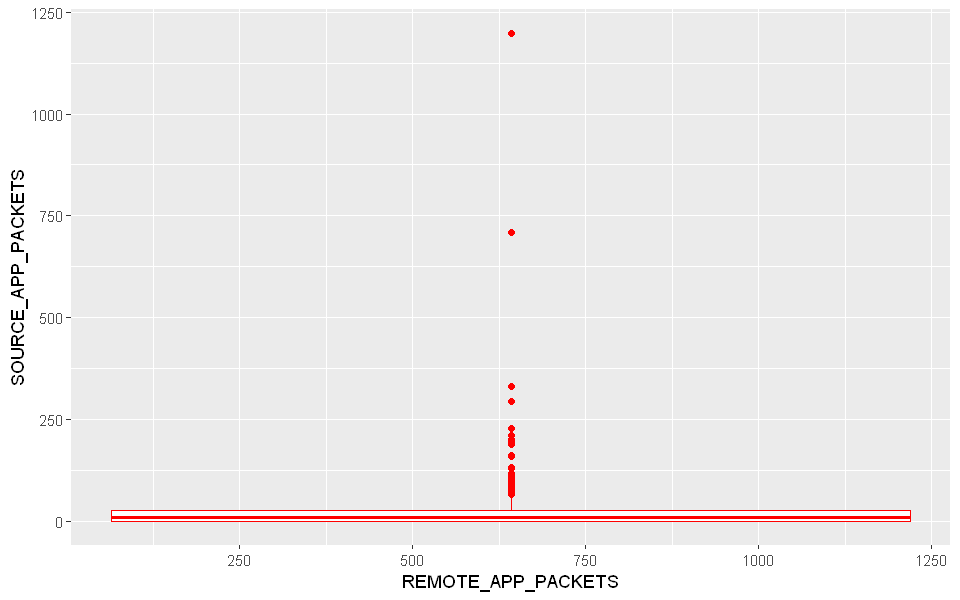

In [41]:
ggplot(train, aes(REMOTE_APP_PACKETS, y=SOURCE_APP_PACKETS)) + 
  geom_boxplot(color = 'red')

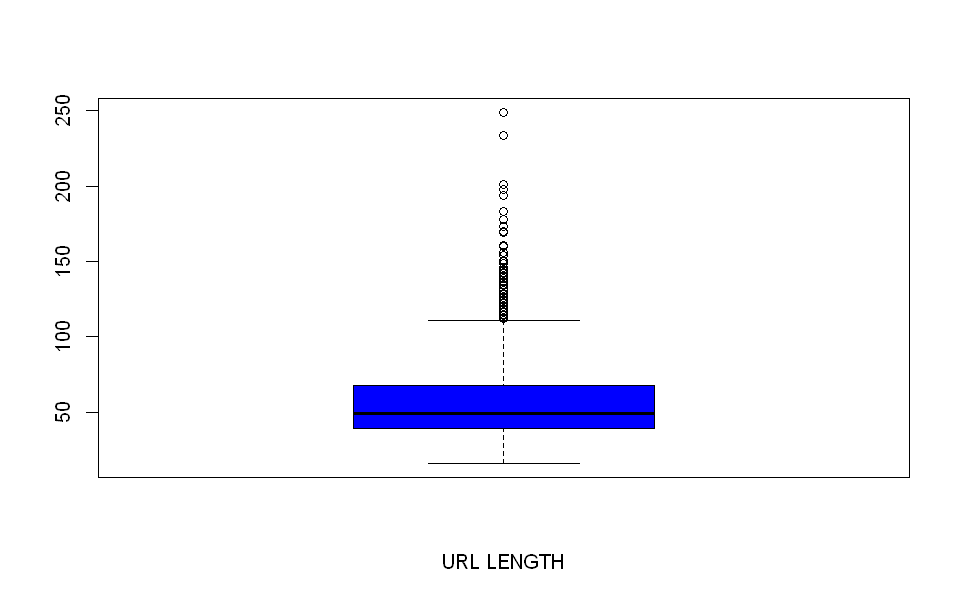

In [42]:
boxplot(train$URL_LENGTH, data=train, color = 'red', xlab = 'URL LENGTH',col = 'blue')

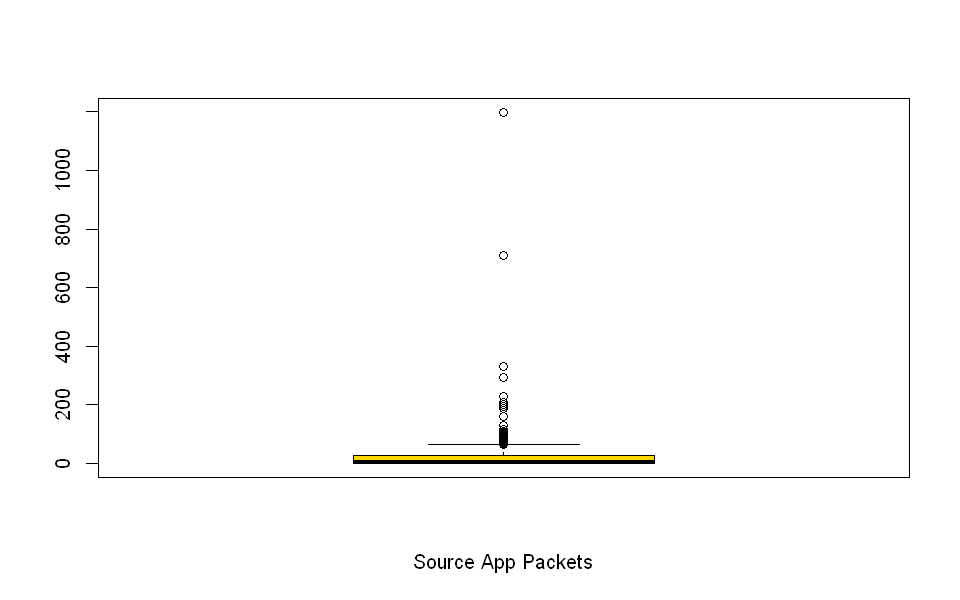

In [43]:
boxplot(train$SOURCE_APP_PACKETS, data=train, xlab = 'Source App Packets', col = 'gold')

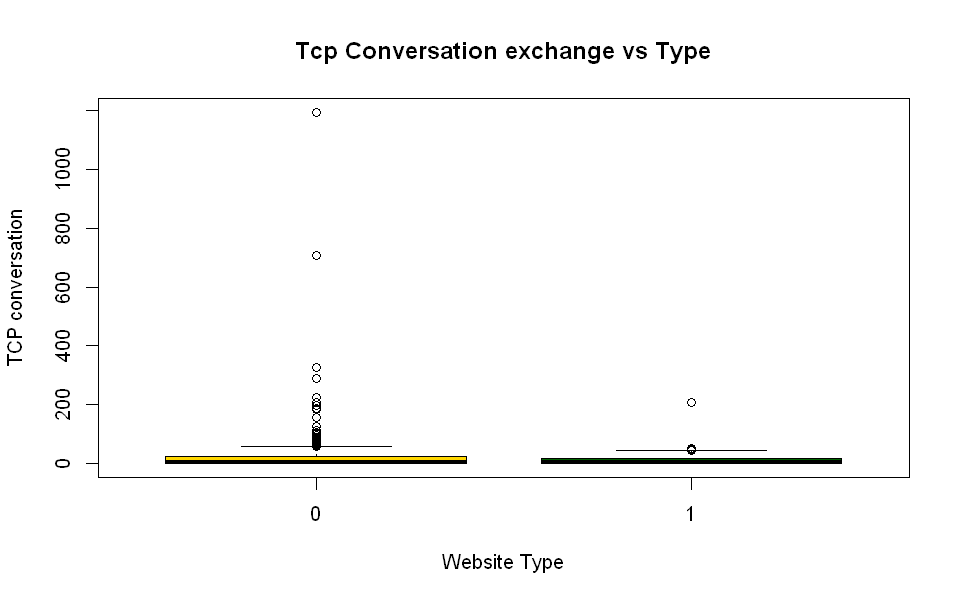

In [44]:
boxplot(TCP_CONVERSATION_EXCHANGE~Type,data=train, main="Tcp Conversation exchange vs Type",
   xlab="Website Type", ylab="TCP conversation", col=(c("gold","darkgreen")))

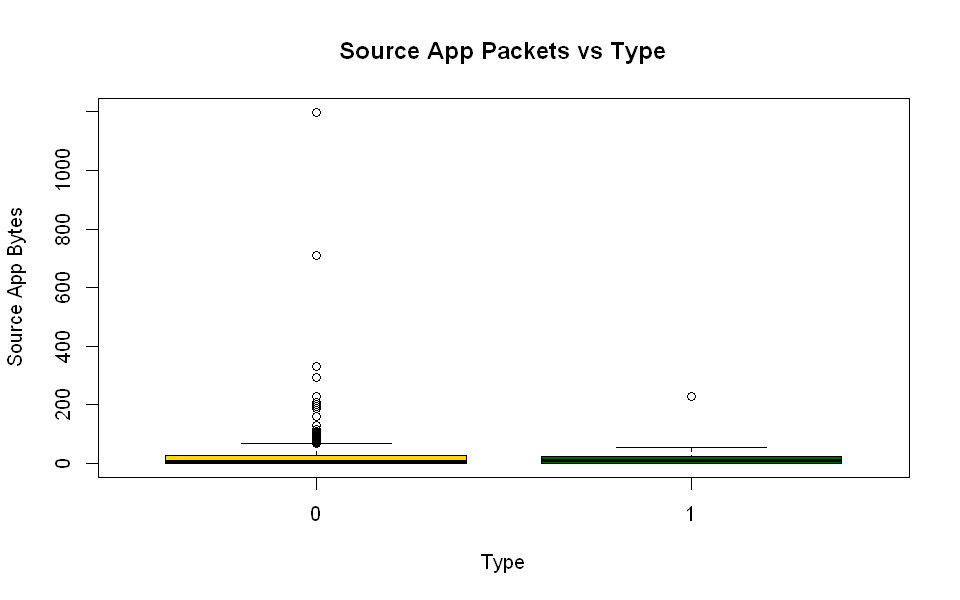

In [45]:
boxplot(SOURCE_APP_PACKETS~Type,data=train, main="Source App Packets vs Type",
   xlab="Type", ylab="Source App Bytes", col=(c("gold","darkgreen")))

In [46]:
train_cap = train[,c("REMOTE_APP_PACKETS", "URL_LENGTH", "SOURCE_APP_PACKETS","REMOTE_APP_BYTES","SOURCE_APP_BYTES",
                     "APP_BYTES", "REMOTE_IPS", "DIST_REMOTE_TCP_PORT","TCP_CONVERSATION_EXCHANGE")]
train_other = train[,-c(2,11,12,13,14,15,16,17,18)]
head(train_other)

URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,APP_PACKETS,DNS_QUERY_TIMES,Type
M0_109,7,iso-8859-1,nginx,263.00,None,None,10/10/2015 18:21,None,9,2,1
B0_2314,6,UTF-8,Apache/2.4.10,15087.00,None,None,None,None,17,0,0
B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,324.00,None,None,None,None,0,0,0
B0_113,6,ISO-8859-1,nginx,162.00,US,AK,7/10/1997 4:00,12/09/2013 0:45,39,8,0
B0_403,6,UTF-8,None,124140.00,US,TX,12/05/1996 0:00,11/04/2017 0:00,61,4,0
B0_2064,7,UTF-8,nginx,11726.93,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,0,0


In [47]:
str(train_cap)
str(train_other)

'data.frame':	1781 obs. of  9 variables:
 $ REMOTE_APP_PACKETS       : int  10 19 0 37 62 13 13 0 3 1 ...
 $ URL_LENGTH               : int  16 16 16 17 17 18 18 19 20 20 ...
 $ SOURCE_APP_PACKETS       : int  9 17 0 39 61 11 14 0 2 2 ...
 $ REMOTE_APP_BYTES         : int  832 1230 0 4380 4586 894 1327 0 146 146 ...
 $ SOURCE_APP_BYTES         : int  1153 1265 0 18784 129889 838 8559 0 213 62 ...
 $ APP_BYTES                : int  700 1230 0 3812 4278 894 1189 0 0 0 ...
 $ REMOTE_IPS               : int  2 4 0 3 5 9 3 0 0 0 ...
 $ DIST_REMOTE_TCP_PORT     : int  0 7 0 22 2 6 0 0 0 0 ...
 $ TCP_CONVERSATION_EXCHANGE: int  7 17 0 31 57 11 12 0 0 0 ...
'data.frame':	1781 obs. of  12 variables:
 $ URL                      : Factor w/ 1781 levels "B0_1","B0_10",..: 1575 797 1480 133 983 548 1043 131 1705 1706 ...
 $ NUMBER_SPECIAL_CHARACTERS: int  7 6 6 6 6 7 6 6 5 5 ...
 $ CHARSET                  : Factor w/ 9 levels "ISO-8859","iso-8859-1",..: 2 7 5 3 7 7 2 5 6 6 ...
 $ SERVER           

In [48]:
pcap <- function(x){
  for (i in which(sapply(x, is.numeric))) {
    quantiles <- quantile( x[,i], c(.05, .95 ), na.rm =TRUE)
    x[,i] = ifelse(x[,i] < quantiles[1] , quantiles[1], x[,i])
    x[,i] = ifelse(x[,i] > quantiles[2] , quantiles[2], x[,i])}
  x}

# Replacing extreme values with percentiles
train_capped = pcap(train_cap)
summary(train$URL_LENGTH)
summary(train_capped)

#join back with rest of data;
train_combine = cbind(train_other, train_capped)
summary(train_combine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   39.00   49.00   56.96   68.00  249.00 

 REMOTE_APP_PACKETS   URL_LENGTH     SOURCE_APP_PACKETS REMOTE_APP_BYTES
 Min.   : 0.00      Min.   : 26.00   Min.   : 0.00      Min.   :   0    
 1st Qu.: 0.00      1st Qu.: 39.00   1st Qu.: 0.00      1st Qu.:   0    
 Median : 9.00      Median : 49.00   Median : 8.00      Median : 735    
 Mean   :15.43      Mean   : 55.72   Mean   :15.78      Mean   :1640    
 3rd Qu.:25.00      3rd Qu.: 68.00   3rd Qu.:26.00      3rd Qu.:2701    
 Max.   :62.00      Max.   :110.00   Max.   :61.00      Max.   :6657    
 SOURCE_APP_BYTES   APP_BYTES      REMOTE_IPS     DIST_REMOTE_TCP_PORT
 Min.   :    0    Min.   :   0   Min.   : 0.000   Min.   : 0.000      
 1st Qu.:    0    1st Qu.:   0   1st Qu.: 0.000   1st Qu.: 0.000      
 Median :  579    Median : 672   Median : 2.000   Median : 0.000      
 Mean   :10090    Mean   :1473   Mean   : 2.965   Mean   : 4.001      
 3rd Qu.: 9806    3rd Qu.:2328   3rd Qu.: 5.000   3rd Qu.: 5.000      
 Max.   :66124    Max.   :6235   Max.   :10.000   Max.   :26.00


 1 values imputed to nginx 


 812 values imputed to 11726.93 


 1 values imputed to 0 



      URL       NUMBER_SPECIAL_CHARACTERS       CHARSET   
 B0_1   :   1   Min.   : 5.00             UTF-8     :676  
 B0_10  :   1   1st Qu.: 8.00             ISO-8859-1:427  
 B0_100 :   1   Median :10.00             utf-8     :379  
 B0_1000:   1   Mean   :11.11             us-ascii  :155  
 B0_1001:   1   3rd Qu.:13.00             iso-8859-1:134  
 B0_1002:   1   Max.   :43.00             None      :  7  
 (Other):1775                             (Other)   :  3  
                   SERVER    CONTENT_LENGTH   WHOIS_COUNTRY    WHOIS_STATEPRO
 Apache               :386   Min.   :     0   US     :1103   CA       :372   
 nginx                :212   1st Qu.:  1502   None   : 306   None     :362   
 None                 :175   Median : 11727   CA     :  84   NY       : 75   
 Microsoft-HTTPAPI/2.0:113   Mean   : 11727   ES     :  63   WA       : 65   
 cloudflare-nginx     : 94   3rd Qu.: 11727   AU     :  35   Barcelona: 62   
 Microsoft-IIS/7.5    : 51   Max.   :649263   PA     :  21  

In [49]:
#log transfomartions
train_combine$REMOTE_APP_PACKETS=log(train_combine$REMOTE_APP_PACKETS+1)
train_combine$URL_LENGTH=log(train_combine$URL_LENGTH+1)
train_combine$SOURCE_APP_PACKETS=log(train_combine$SOURCE_APP_PACKETS+1)
train_combine$TCP_CONVERSATION_EXCHANGE=log(train_combine$TCP_CONVERSATION_EXCHANGE+1)
train_combine$DIST_REMOTE_TCP_PORT=log(train_combine$DIST_REMOTE_TCP_PORT+1)
train_combine$REMOTE_APP_BYTES=log(train_combine$REMOTE_APP_BYTES+1)
train_combine$SOURCE_APP_BYTES=log(train_combine$SOURCE_APP_BYTES+1)
train_combine$APP_BYTES=log(train_combine$APP_BYTES+1)
train_combine$REMOTE_IPS=log(train_combine$REMOTE_IPS+1)

train_cap$REMOTE_APP_PACKETS=log(train_cap$REMOTE_APP_PACKETS+1)
train_cap$URL_LENGTH=log(train_cap$URL_LENGTH+1)
train_cap$SOURCE_APP_PACKETS=log(train_cap$SOURCE_APP_PACKETS+1)
train_cap$TCP_CONVERSATION_EXCHANGE=log(train_cap$TCP_CONVERSATION_EXCHANGE+1)
train_cap$DIST_REMOTE_TCP_PORT=log(train_cap$DIST_REMOTE_TCP_PORT+1)
train_cap$REMOTE_APP_BYTES=log(train_cap$REMOTE_APP_BYTES+1)
train_cap$SOURCE_APP_BYTES=log(train_cap$SOURCE_APP_BYTES+1)
train_cap$APP_BYTES=log(train_cap$APP_BYTES+1)
train_cap$REMOTE_IPS=log(train_cap$REMOTE_IPS+1)

In [50]:
indexes = sample(1:nrow(train_combine), size=0.2*nrow(train_combine))
 
# Split data
x_test = train_combine[indexes,]
dim(x_test) 
x_train = train_combine[-indexes,]
dim(x_train)

[1] 356  21

[1] 1425   21

In [51]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
#x_train <- train_combine[,train_combine.isnumeric]
y_train <- train_combine$Type
#x_test <- 
#x <- cbind(x_train,y_train)
# Train the model using the training sets and check score
linear <- lm(y_train ~ ., data = train_cap)


summary(linear)
#Predict Output

predicted= predict(linear,x_test)


Call:
lm(formula = y_train ~ ., data = train_cap)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61870 -0.12777 -0.03513  0.00006  1.26679 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0326289  0.0650728   0.501   0.6161    
REMOTE_APP_PACKETS         0.2069594  0.0403455   5.130 3.22e-07 ***
URL_LENGTH                 0.0006196  0.0162186   0.038   0.9695    
SOURCE_APP_PACKETS         0.0769367  0.0914591   0.841   0.4003    
REMOTE_APP_BYTES           0.0578623  0.0493911   1.172   0.2416    
SOURCE_APP_BYTES           0.0737725  0.0112181   6.576 6.33e-11 ***
APP_BYTES                 -0.0764944  0.0481829  -1.588   0.1126    
REMOTE_IPS                 0.0370648  0.0185127   2.002   0.0454 *  
DIST_REMOTE_TCP_PORT      -0.0943124  0.0084708 -11.134  < 2e-16 ***
TCP_CONVERSATION_EXCHANGE -0.4060215  0.0886340  -4.581 4.95e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Res

In [52]:
# Train the model using the training sets and check score
logistic <- glm(y_train ~ ., data = train_cap,family='binomial')
summary(logistic)
#Predict Output
predicted= predict(logistic,x_test)


Call:
glm(formula = y_train ~ ., family = "binomial", data = train_cap)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8037  -0.2734  -0.1904  -0.1201   3.9481  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.2645     0.9890  -2.290   0.0220 *  
REMOTE_APP_PACKETS          3.8553     0.6196   6.222 4.90e-10 ***
URL_LENGTH                 -0.4395     0.2440  -1.801   0.0717 .  
SOURCE_APP_PACKETS          0.1241     1.1820   0.105   0.9164    
REMOTE_APP_BYTES            0.4083     0.7794   0.524   0.6004    
SOURCE_APP_BYTES            0.2236     0.1431   1.562   0.1183    
APP_BYTES                  -0.2506     0.7574  -0.331   0.7408    
REMOTE_IPS                  0.4555     0.2760   1.650   0.0988 .  
DIST_REMOTE_TCP_PORT       -1.5057     0.1772  -8.497  < 2e-16 ***
TCP_CONVERSATION_EXCHANGE  -4.4254     1.1116  -3.981 6.86e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

Call:
rpart(formula = y_train ~ ., data = train_cap, method = "class", 
    control = rpart.control(cp = 0.01))
  n= 1781 

          CP nsplit rel error    xerror       xstd
1 0.12037037      0 1.0000000 1.0000000 0.06378203
2 0.08564815      3 0.6388889 0.6574074 0.05292342
3 0.01620370      5 0.4675926 0.4814815 0.04581392
4 0.01234568     10 0.3796296 0.4768519 0.04560672
5 0.01000000     13 0.3425926 0.4629630 0.04497779

Variable importance
         SOURCE_APP_BYTES        REMOTE_APP_PACKETS          REMOTE_APP_BYTES 
                       16                        16                        16 
                APP_BYTES        SOURCE_APP_PACKETS                REMOTE_IPS 
                       15                        15                        10 
TCP_CONVERSATION_EXCHANGE      DIST_REMOTE_TCP_PORT                URL_LENGTH 
                        7                         3                         2 

Node number 1: 1781 observations,    complexity param=0.1203704
  predicte


Classification tree:
rpart(formula = y_train ~ ., data = train_cap, method = "class", 
    control = rpart.control(cp = 0.01))

Variables actually used in tree construction:
[1] DIST_REMOTE_TCP_PORT      REMOTE_APP_BYTES         
[3] REMOTE_APP_PACKETS        REMOTE_IPS               
[5] SOURCE_APP_BYTES          SOURCE_APP_PACKETS       
[7] TCP_CONVERSATION_EXCHANGE URL_LENGTH               

Root node error: 216/1781 = 0.12128

n= 1781 

        CP nsplit rel error  xerror     xstd
1 0.120370      0   1.00000 1.00000 0.063782
2 0.085648      3   0.63889 0.65741 0.052923
3 0.016204      5   0.46759 0.48148 0.045814
4 0.012346     10   0.37963 0.47685 0.045607
5 0.010000     13   0.34259 0.46296 0.044978


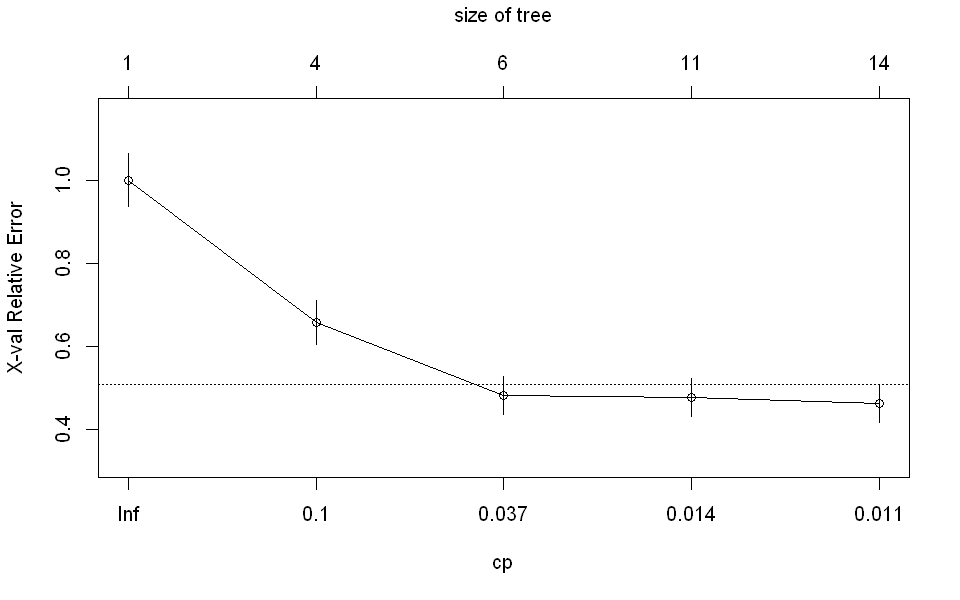

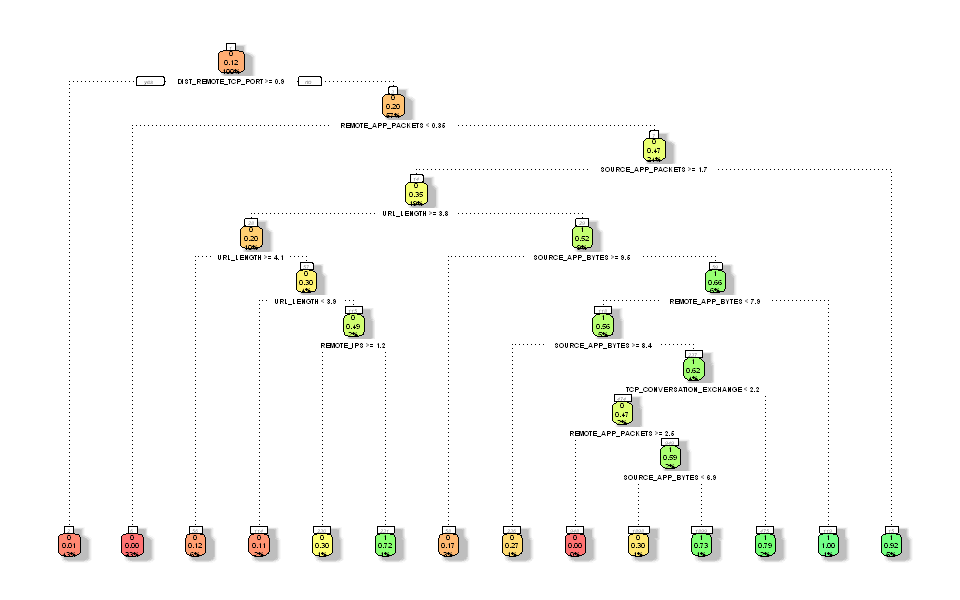

In [58]:
library(rpart)
library(rpart.plot)
# grow tree 
fit <- rpart(y_train ~ ., data = train_cap ,method="class",control = rpart.control(cp = 0.01))
summary(fit)
predicted= predict(fit,x_test)
plotcp(fit)
printcp(fit)
rpart.plot(fit, 
           box.palette="RdYlGn",
           branch.lty=3, shadow.col="gray", nn=TRUE)

In [54]:
library(e1071)
#x <- cbind(x_train,y_train)
# Fitting model
fit <-svm(y_train ~ ., data = train_cap)# try using the train_cap and train_other
summary(fit)
#Predict Output 
predicted= predict(fit,x_test)

Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'e1071'

The following object is masked from 'package:Hmisc':

    impute




Call:
svm(formula = y_train ~ ., data = train_cap)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1111111 
    epsilon:  0.1 


Number of Support Vectors:  427






In [55]:
library(e1071)
# Fitting model
fit <-naiveBayes(y_train ~ ., data = train_combine)#read and try to find parameters
summary(fit)
#Predict Output 
predicted= predict(fit,x_test)

          Length Class  Mode   
apriori    2     table  numeric
tables    21     -none- list   
levels     0     -none- NULL   
isnumeric 21     -none- logical
call       4     -none- call   

In [56]:
#install.packages("forecast")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

                Length Class  Mode     
call               7   -none- call     
type               1   -none- character
predicted       1781   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1781   -none- numeric  
importance        18   -none- numeric  
importanceSD       9   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1781   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

ERROR: Error in testaccuracy(object, x, test, d, D): Not enough forecasts. Check that forecasts and test data match.


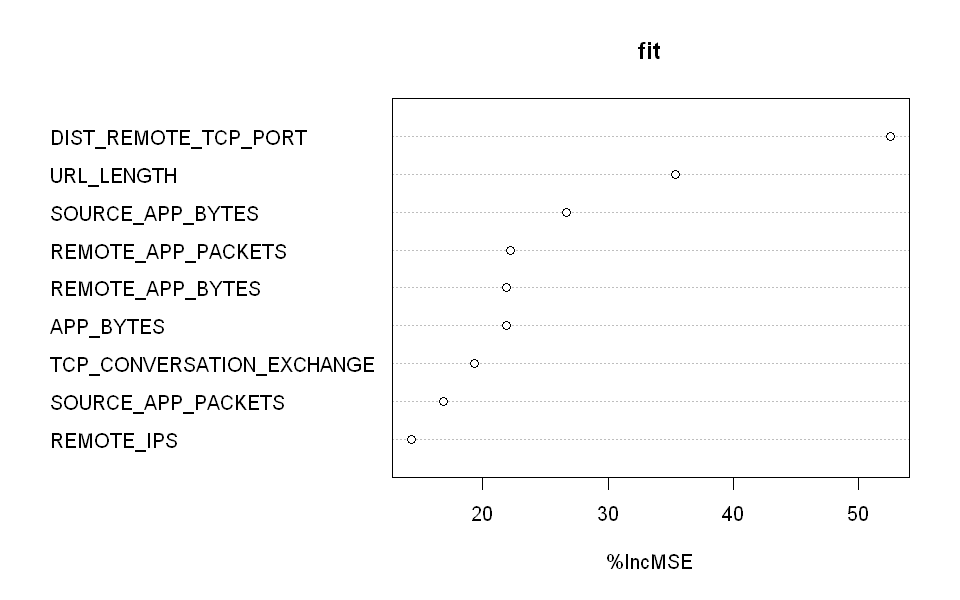

In [57]:
library(randomForest)
library(forecast)
# Fitting model
fit <- randomForest(y_train ~ ., train_cap,importance =TRUE,ntree=500,nodesize=7, na.action=na.roughfix)
summary(fit)
varImpPlot(fit, type=1) # plotting the graph
#Predict Output 
predicted= predict(fit,x_test)
accuracy(predicted, train_combine$Ty)